# 1st_Ques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# entropy
def entropy(pmf):

    pmf = np.array(pmf)
    if(np.sum(pmf) != 1) :
        print("The sum of the PMF = 1")
        return
    pmf = pmf[pmf > 0]

    # Calculate entropy
    entropy_value = -np.sum(pmf * np.log2(pmf))

    return entropy_value


def joint_entropy(joint_pmf):

    flat_joint_pmf = joint_pmf.flatten()
    posive_joint_pmf = []
    for jpmf in flat_joint_pmf:
      if jpmf > 0:
        posive_joint_pmf.append(jpmf)

    flat_joint_pmf = posive_joint_pmf
    jt_value = -np.sum(flat_joint_pmf * np.log2(flat_joint_pmf))

    return jt_value



def kl_divergence(p, q):

    # to avoid log(0)s
    non_zero_indices = (p > 0) & (q > 0)
    p_non_zero = p[non_zero_indices]
    q_non_zero = q[non_zero_indices]

    kl_div = np.sum(p_non_zero * np.log2(p_non_zero / q_non_zero))

    return kl_div

# def normalized_histogram(image):

#     size = len(image)

#     histogram = np.zeros(size)

#     for row in image:
#         for pixel in row:
#             intensity = int(pixel * 255)
#             histogram[intensity] += 1

#     total_pixels = image.shape[0] * image.shape[1]
#     normalized_hist = np.array(histogram) / total_pixels

#     return normalized_hist

def cross_entropy(pmf_p, pmf_q):
    return entropy(pmf_p) + kl_divergence(pmf_p, pmf_q)



def normalized_histogram(image):
    histogram, _ = np.histogram(image, bins=256, range=(0, 255))
    normalized_hist = histogram / histogram.sum()
    return normalized_hist


from PIL import Image
import os

left_image_path = "/content/left.png"
right_image_path = "/content/right.png"


if os.path.exists(left_image_path) and os.path.exists(right_image_path):
    left_image = Image.open(left_image_path).convert("L")
    right_image = Image.open(right_image_path).convert("L")

    left_image_array = np.array(left_image)
    right_image_array = np.array(right_image)
    left_norm_hist = normalized_histogram(left_image_array)
    right_norm_hist = normalized_histogram(right_image_array)


    print(f"Cross entropy :{cro_entropy}")
else:
    print("Images not found.")

Cross entropy :7.273398119987326


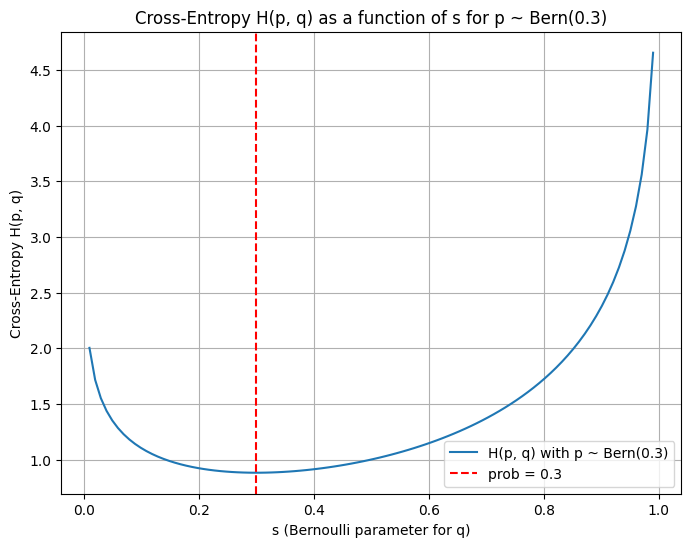

In [ ]:

def bernoulli_pmf(prob):
    return np.array([1 - prob, prob])


prob = 0.3
p = bernoulli_pmf(prob)
s_val = np.linspace(0.01, 0.99, 100)
cross_entropy_values = []

for s in s_val:
    q = bernoulli_pmf(s)
    cross_entropy_values.append(cross_entropy(p, q))


plt.figure(figsize=(8, 6))
plt.plot(s_val, cross_entropy_values, label=f'H(p, q) with p ~ Bern({prob})')
plt.xlabel('s (Bernoulli parameter for q)')
plt.ylabel('Cross-Entropy H(p, q)')
plt.title(f'Cross-Entropy H(p, q) as a function of s for p ~ Bern({prob})')
plt.axvline(x=prob, color='red', linestyle='--', label=f'prob = {prob}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The definition of JS divergence between two PDFs p and q is
# given by: J(p, q) = 0.5 ∗ (D(p||m) + D(q||m)) where m =
# p+q
# 2
# and D(p||q) is the KL divergence

# between p and q. Write a function that accepts two PDFs (PMFs) p, q and outputs the JS diver-
# gence between them.


def js_divergence(pdf_p,pdf_q):

  m = (pdf_p + pdf_q)*0.5
  return 0.5*(kl_divergence(pdf_p,m) + kl_divergence(pdf_q,m))

print(f"KL_divergence of left histogram and right histogram :{kl_divergence(left_norm_hist,right_norm_hist)}")
print(f"KL_divergence of right histogram and left histogram :{kl_divergence(right_norm_hist,left_norm_hist)}")

print(f"js_divergence of left image histogram and right histogram :{js_divergence(left_norm_hist,right_norm_hist)}")
print(f"js_divergence of rihgt image histogram and left histogram :{js_divergence(right_norm_hist,left_norm_hist)}")


KL_divergence of left histogram and right histogram :0.015104015237387056
KL_divergence of right histogram and left histogram :0.014409785833354479
js_divergence of left image histogram and right histogram :0.003673039769314829
js_divergence of rihgt image histogram and left histogram :0.003673039769314829


From the above ouput we can observe that KL Divergence is not symmetric as there is a change in output after reversing the distributions where as JS Divergence(Jensen Shannon Divergence) is symmetric since they is no change in JS Divergence after reversing the distributions

In [ ]:
# (c) Wasserstein Distance: The Wasserstein-1 distance between two PDFs r and s is given by: W1(r,s) =
# inf
# π∈Π(r,s)
# E(x,y)∼π|x − y|. The set Π(r,s) is composed of all bivariate joint PDFs whose marginals
# equal r and s. Given a tuple (p(X,Y)

# ,rX,sY) of a joint histogram p(X,Y)

# , and marginals rX,sY,
# write a function that accepts this tuple and checks if pX,Y ∈ Π(r,s). Verify your function with a
# positive example and a negative example. (2)

import numpy as np


def is_joint_marginals(joint_histogram, r_X, s_Y):

    marginal_X = np.sum(joint_histogram, axis=1)


    marginal_Y = np.sum(joint_histogram, axis=0)

    match_X = np.allclose(marginal_X, r_X)
    match_Y = np.allclose(marginal_Y, s_Y)

    if match_X and match_Y:
        print("The joint distribution p(X,Y) belongs to Pi(r_X, s_Y).")
        return True
    else:
        print("The joint distribution p(X,Y) does NOT belong to Pi(r_X, s_Y).")
        # return False

# Positive
joint_hist_pos = np.array([[0.2, 0.1],
                           [0.3, 0.4]])

r_X_pos = np.array([0.3, 0.7])
s_Y_pos = np.array([0.5, 0.5])

# Negative
joint_hist_neg = np.array([[0.1, 0.4],
                           [0.2, 0.3]])

r_X_neg = np.array([0.4, 0.6])
s_Y_neg = np.array([0.5, 0.5])

# EX :
print("Positive Example:")
is_joint_marginals(joint_hist_pos, r_X_pos, s_Y_pos)

print("\nNegative Example:")
is_joint_marginals(joint_hist_neg, r_X_neg, s_Y_neg)


Positive Example:
The joint distribution p(X,Y) belongs to Pi(r_X, s_Y).

Negative Example:
The joint distribution p(X,Y) does NOT belong to Pi(r_X, s_Y).


# 2nd_Ques

2nd_question - part a

100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.85MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.68MB/s]



Epoch 1/20
Discriminator Loss: 0.5586
Generator Loss: 2.3978
Accuracy on Training Set (Real Images): 0.9036
Accuracy on Testing Set (Real Images): 0.9446
Accuracy on Generated Images (Fake): 0.9066

Epoch 2/20
Discriminator Loss: 0.6773
Generator Loss: 1.5931
Accuracy on Training Set (Real Images): 0.8795
Accuracy on Testing Set (Real Images): 0.9842
Accuracy on Generated Images (Fake): 0.8964

Epoch 3/20
Discriminator Loss: 0.5909
Generator Loss: 1.7750
Accuracy on Training Set (Real Images): 0.8910
Accuracy on Testing Set (Real Images): 0.9568
Accuracy on Generated Images (Fake): 0.9221

Epoch 4/20
Discriminator Loss: 0.6566
Generator Loss: 1.6781
Accuracy on Training Set (Real Images): 0.8820
Accuracy on Testing Set (Real Images): 0.9301
Accuracy on Generated Images (Fake): 0.9083

Epoch 5/20
Discriminator Loss: 0.6801
Generator Loss: 1.6923
Accuracy on Training Set (Real Images): 0.8734
Accuracy on Testing Set (Real Images): 0.9944
Accuracy on Generated Images (Fake): 0.9012

Epoc

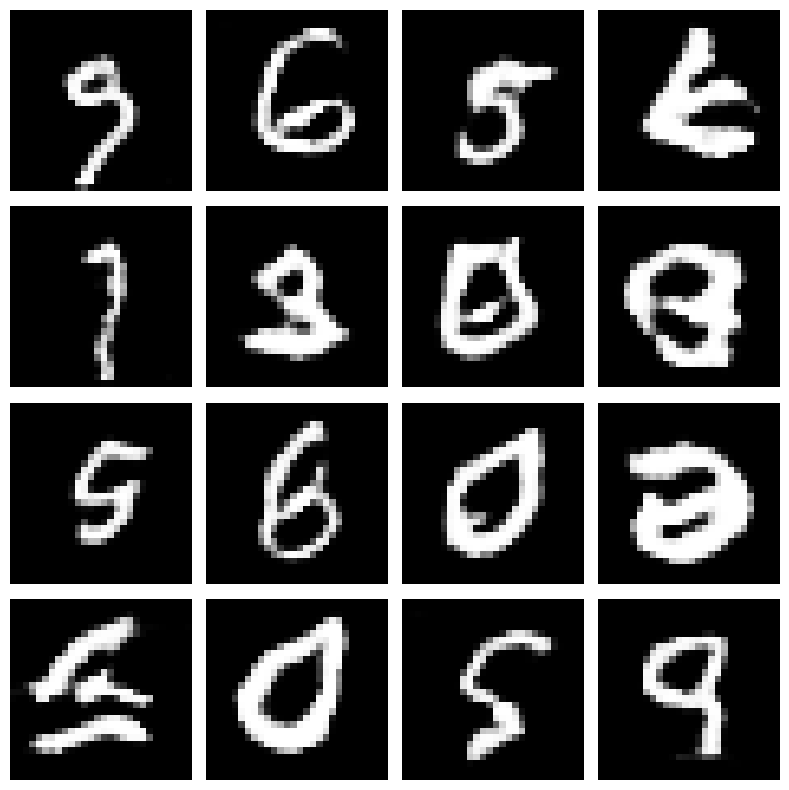

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transformations: Scale images to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),           # Converts to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Scales to [-1, 1]
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Linear(100, 128 * 7 * 7)  # Noise to 7x7 feature map
        self.transconv1 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.transconv2 = nn.Sequential(
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()  # Output in [-1, 1]
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)  # Reshape to (batch_size, 128, 7, 7)
        x = self.transconv1(x)     # Upsample to (64, 14, 14)
        x = self.transconv2(x)     # Upsample to (1, 28, 28)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()  # Probability output
        )

    def forward(self, x):
        x = self.conv1(x)       # Downsample to (64, 14, 14)
        x = self.conv2(x)       # Downsample to (128, 7, 7)
        x = x.view(-1, 128 * 7 * 7)  # Flatten
        x = self.fc(x)          # Output probability
        return x


def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d)):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)
generator.apply(weights_init)
discriminator.apply(weights_init)


optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

num_epochs = 20
for epoch in range(num_epochs):
    # Accumulators for metrics
    total_loss_D = 0
    total_loss_G = 0
    total_correct_real = 0
    total_real = 0
    total_correct_fake = 0
    total_fake = 0
    num_batches = 0

    for real_images, _ in train_loader:
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # --- Train Discriminator ---
        optimizer_D.zero_grad()
        # Real images (label = 1)
        output_real = discriminator(real_images)
        loss_real = criterion(output_real, torch.ones(batch_size, 1).to(device))
        # Fake images (label = 0)
        noise = torch.randn(batch_size, 100).to(device)
        fake_images = generator(noise)
        output_fake = discriminator(fake_images.detach())  # Detach to avoid backprop through generator
        loss_fake = criterion(output_fake, torch.zeros(batch_size, 1).to(device))
        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # --- Train Generator ---
        optimizer_G.zero_grad()
        noise = torch.randn(batch_size, 100).to(device)
        fake_images = generator(noise)
        output = discriminator(fake_images)
        loss_G = criterion(output, torch.ones(batch_size, 1).to(device))  # Fool discriminator
        loss_G.backward()
        optimizer_G.step()

        # Accumulate metrics
        total_loss_D += loss_D.item()
        total_loss_G += loss_G.item()
        total_correct_real += (output_real > 0.5).sum().item()
        total_real += batch_size
        total_correct_fake += (output_fake < 0.5).sum().item()
        total_fake += batch_size
        num_batches += 1

    # Compute averages
    avg_loss_D = total_loss_D / num_batches
    avg_loss_G = total_loss_G / num_batches
    train_real_acc = total_correct_real / total_real
    fake_acc = total_correct_fake / total_fake

    # Test set accuracy
    total_correct_test = 0
    total_test = 0
    with torch.no_grad():
        for real_images, _ in test_loader:
            real_images = real_images.to(device)
            output = discriminator(real_images)
            total_correct_test += (output > 0.5).sum().item()
            total_test += real_images.size(0)
    test_real_acc = total_correct_test / total_test

    # Print results clearly
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    print(f"Discriminator Loss: {avg_loss_D:.4f}")
    print(f"Generator Loss: {avg_loss_G:.4f}")
    print(f"Accuracy on Training Set (Real Images): {train_real_acc:.4f}")
    print(f"Accuracy on Testing Set (Real Images): {test_real_acc:.4f}")
    print(f"Accuracy on Generated Images (Fake): {fake_acc:.4f}")


with torch.no_grad():
    noise = torch.randn(16, 100).to(device)
    generated_images = generator(noise).cpu().numpy()

# Plot images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = generated_images[i].squeeze()
    img = (img + 1) / 2  # Rescale from [-1, 1] to [0, 1] for display
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


2nd_question - part b

Epoch 1/20, Step 0/938:
  Discriminator Loss: 0.6185, Accuracy: 0.9766
  Generator Loss: 0.8004
Epoch 1/20, Step 100/938:
  Discriminator Loss: 1.6947, Accuracy: 0.5000
  Generator Loss: 6.5167
Epoch 1/20, Step 200/938:
  Discriminator Loss: 0.3718, Accuracy: 0.8359
  Generator Loss: 2.2104
Epoch 1/20, Step 300/938:
  Discriminator Loss: 0.3214, Accuracy: 0.8125
  Generator Loss: 1.0439
Epoch 1/20, Step 400/938:
  Discriminator Loss: 0.2057, Accuracy: 0.9453
  Generator Loss: 1.9981
Epoch 1/20, Step 500/938:
  Discriminator Loss: 0.4014, Accuracy: 0.8281
  Generator Loss: 1.4281
Epoch 1/20, Step 600/938:
  Discriminator Loss: 0.3020, Accuracy: 0.9062
  Generator Loss: 1.4999
Epoch 1/20, Step 700/938:
  Discriminator Loss: 0.3022, Accuracy: 0.8984
  Generator Loss: 2.1600
Epoch 1/20, Step 800/938:
  Discriminator Loss: 0.2602, Accuracy: 0.9141
  Generator Loss: 1.9421
Epoch 1/20, Step 900/938:
  Discriminator Loss: 0.2460, Accuracy: 0.9141
  Generator Loss: 1.7334
Epoch 2/20, Step 0/938

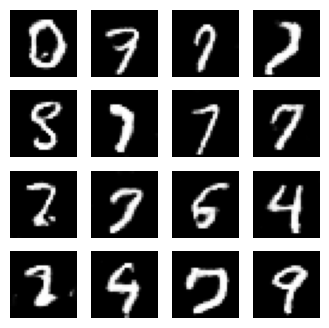

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 64
epochs = 20
k = 2
noise_dim = 100

# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Datasets and DataLoaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 7 * 7 * 128),
            nn.Unflatten(1, (128, 7, 7)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator().to(device)
discriminator = Discriminator().to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

# Fixed noise
fixed_noise = torch.randn(16, noise_dim, device=device)

# Training loop
for epoch in range(epochs):
    for step, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        current_batch_size = real_images.size(0)

        # Train Discriminator k times
        for _ in range(k):
            real_labels = torch.ones(current_batch_size, 1, device=device)
            output_real = discriminator(real_images)
            loss_real = criterion(output_real, real_labels)

            noise = torch.randn(current_batch_size, noise_dim, device=device)
            fake_images = generator(noise)
            fake_labels = torch.zeros(current_batch_size, 1, device=device)
            output_fake = discriminator(fake_images.detach())
            loss_fake = criterion(output_fake, fake_labels)

            loss_D = (loss_real + loss_fake) / 2
            optimizer_D.zero_grad()
            loss_D.backward()
            optimizer_D.step()

        # Train Generator
        noise = torch.randn(current_batch_size, noise_dim, device=device)
        fake_images = generator(noise)
        g_labels = torch.ones(current_batch_size, 1, device=device)
        output = discriminator(fake_images)
        loss_G = criterion(output, g_labels)

        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

        # Compute accuracies
        with torch.no_grad():
            acc_real = (output_real > 0.5).float().mean().item()
            acc_fake = (output_fake < 0.5).float().mean().item()
            acc_D = (acc_real + acc_fake) / 2

        # Print progress
        if step % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Step {step}/{len(train_loader)}:")
            print(f"  Discriminator Loss: {loss_D.item():.4f}, Accuracy: {acc_D:.4f}")
            print(f"  Generator Loss: {loss_G.item():.4f}")

    # Generate images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            generated_images = generator(fixed_noise).cpu().detach().numpy()
            generated_images = (generated_images + 1) / 2
            fig, axes = plt.subplots(4, 4, figsize=(4, 4))
            for i, ax in enumerate(axes.flat):
                ax.imshow(generated_images[i, 0], cmap='gray')
                ax.axis('off')
            plt.savefig(f'generated_images_epoch_{epoch+1}.png')
            plt.close()

# Evaluation function
def evaluate_discriminator(discriminator, dataloader, device):
    discriminator.eval()
    total_loss = 0
    total_acc = 0
    total_samples = 0
    criterion = nn.BCELoss()
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            labels = torch.ones(images.size(0), 1, device=device)
            outputs = discriminator(images)
            loss = criterion(outputs, labels)
            acc = (outputs > 0.5).float().mean().item()
            total_loss += loss.item() * images.size(0)
            total_acc += acc * images.size(0)
            total_samples += images.size(0)
    avg_loss = total_loss / total_samples
    avg_acc = total_acc / total_samples
    discriminator.train()
    return avg_loss, avg_acc

# Final evaluation
loss_train, acc_train = evaluate_discriminator(discriminator, train_loader, device)
print(f"\nFinal Training Results:")
print(f"  Discriminator Loss on Training Data: {loss_train:.4f}")
print(f"  Discriminator Accuracy on Training Data: {acc_train:.4f}")

loss_test, acc_test = evaluate_discriminator(discriminator, test_loader, device)
print(f"\nFinal Testing Results:")
print(f"  Discriminator Loss on Test Data: {loss_test:.4f}")
print(f"  Discriminator Accuracy on Test Data: {acc_test:.4f}")

# Combined evaluation
noise = torch.randn(len(test_dataset), noise_dim, device=device)
fake_images = generator(noise).detach()
real_images = []
for images, _ in test_loader:
    real_images.append(images.to(device))
real_images = torch.cat(real_images, dim=0)
combined_images = torch.cat([real_images, fake_images], dim=0)
combined_labels = torch.cat([torch.ones(len(test_dataset), 1, device=device),
                            torch.zeros(len(test_dataset), 1, device=device)], dim=0)
with torch.no_grad():
    combined_outputs = discriminator(combined_images)
    loss_combined = criterion(combined_outputs, combined_labels)
    acc_combined = ((combined_outputs > 0.5) == combined_labels).float().mean().item()
print(f"\nDiscriminator Performance on Combined Real and Fake Images:")
print(f"  Combined Loss: {loss_combined.item():.4f}")
print(f"  Combined Accuracy: {acc_combined:.4f}")

# Generate and display final images
noise = torch.randn(16, noise_dim, device=device)
generated_images = generator(noise).cpu().detach().numpy()
generated_images = (generated_images + 1) / 2
print("\nDisplaying Generated Images:")
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, 0], cmap='gray')
    ax.axis('off')
plt.show()

Epoch 1/20, Step 0/938:
  Discriminator Loss: 0.3752, Accuracy: 1.0000
  Generator Loss: 1.2687
Epoch 1/20, Step 100/938:
  Discriminator Loss: 0.0000, Accuracy: 1.0000
  Generator Loss: 10.7168
Epoch 1/20, Step 200/938:
  Discriminator Loss: 0.0053, Accuracy: 1.0000
  Generator Loss: 6.0902
Epoch 1/20, Step 300/938:
  Discriminator Loss: 0.0530, Accuracy: 1.0000
  Generator Loss: 3.4334
Epoch 1/20, Step 400/938:
  Discriminator Loss: 0.0420, Accuracy: 0.9922
  Generator Loss: 4.0218
Epoch 1/20, Step 500/938:
  Discriminator Loss: 0.0977, Accuracy: 0.9766
  Generator Loss: 3.5177
Epoch 1/20, Step 600/938:
  Discriminator Loss: 0.1163, Accuracy: 0.9531
  Generator Loss: 2.5390
Epoch 1/20, Step 700/938:
  Discriminator Loss: 0.1093, Accuracy: 0.9766
  Generator Loss: 3.9249
Epoch 1/20, Step 800/938:
  Discriminator Loss: 0.0805, Accuracy: 0.9688
  Generator Loss: 3.6669
Epoch 1/20, Step 900/938:
  Discriminator Loss: 0.0998, Accuracy: 0.9609
  Generator Loss: 3.2197
Epoch 2/20, Step 0/93

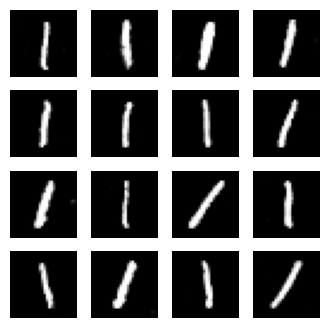

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 64
epochs = 20
k = 5
noise_dim = 100

# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Datasets and DataLoaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 7 * 7 * 128),
            nn.Unflatten(1, (128, 7, 7)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator().to(device)
discriminator = Discriminator().to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

# Fixed noise
fixed_noise = torch.randn(16, noise_dim, device=device)

# Training loop
for epoch in range(epochs):
    for step, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        current_batch_size = real_images.size(0)

        # Train Discriminator k times
        for _ in range(k):
            real_labels = torch.ones(current_batch_size, 1, device=device)
            output_real = discriminator(real_images)
            loss_real = criterion(output_real, real_labels)

            noise = torch.randn(current_batch_size, noise_dim, device=device)
            fake_images = generator(noise)
            fake_labels = torch.zeros(current_batch_size, 1, device=device)
            output_fake = discriminator(fake_images.detach())
            loss_fake = criterion(output_fake, fake_labels)

            loss_D = (loss_real + loss_fake) / 2
            optimizer_D.zero_grad()
            loss_D.backward()
            optimizer_D.step()

        # Train Generator
        noise = torch.randn(current_batch_size, noise_dim, device=device)
        fake_images = generator(noise)
        g_labels = torch.ones(current_batch_size, 1, device=device)
        output = discriminator(fake_images)
        loss_G = criterion(output, g_labels)

        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

        # Compute accuracies
        with torch.no_grad():
            acc_real = (output_real > 0.5).float().mean().item()
            acc_fake = (output_fake < 0.5).float().mean().item()
            acc_D = (acc_real + acc_fake) / 2

        # Print progress
        if step % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Step {step}/{len(train_loader)}:")
            print(f"  Discriminator Loss: {loss_D.item():.4f}, Accuracy: {acc_D:.4f}")
            print(f"  Generator Loss: {loss_G.item():.4f}")

    # Generate images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            generated_images = generator(fixed_noise).cpu().detach().numpy()
            generated_images = (generated_images + 1) / 2
            fig, axes = plt.subplots(4, 4, figsize=(4, 4))
            for i, ax in enumerate(axes.flat):
                ax.imshow(generated_images[i, 0], cmap='gray')
                ax.axis('off')
            plt.savefig(f'generated_images_epoch_{epoch+1}.png')
            plt.close()

# Evaluation function
def evaluate_discriminator(discriminator, dataloader, device):
    discriminator.eval()
    total_loss = 0
    total_acc = 0
    total_samples = 0
    criterion = nn.BCELoss()
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            labels = torch.ones(images.size(0), 1, device=device)
            outputs = discriminator(images)
            loss = criterion(outputs, labels)
            acc = (outputs > 0.5).float().mean().item()
            total_loss += loss.item() * images.size(0)
            total_acc += acc * images.size(0)
            total_samples += images.size(0)
    avg_loss = total_loss / total_samples
    avg_acc = total_acc / total_samples
    discriminator.train()
    return avg_loss, avg_acc

# Final evaluation
loss_train, acc_train = evaluate_discriminator(discriminator, train_loader, device)
print(f"\nFinal Training Results:")
print(f"  Discriminator Loss on Training Data: {loss_train:.4f}")
print(f"  Discriminator Accuracy on Training Data: {acc_train:.4f}")

loss_test, acc_test = evaluate_discriminator(discriminator, test_loader, device)
print(f"\nFinal Testing Results:")
print(f"  Discriminator Loss on Test Data: {loss_test:.4f}")
print(f"  Discriminator Accuracy on Test Data: {acc_test:.4f}")

# Combined evaluation
noise = torch.randn(len(test_dataset), noise_dim, device=device)
fake_images = generator(noise).detach()
real_images = []
for images, _ in test_loader:
    real_images.append(images.to(device))
real_images = torch.cat(real_images, dim=0)
combined_images = torch.cat([real_images, fake_images], dim=0)
combined_labels = torch.cat([torch.ones(len(test_dataset), 1, device=device),
                            torch.zeros(len(test_dataset), 1, device=device)], dim=0)
with torch.no_grad():
    combined_outputs = discriminator(combined_images)
    loss_combined = criterion(combined_outputs, combined_labels)
    acc_combined = ((combined_outputs > 0.5) == combined_labels).float().mean().item()
print(f"\nDiscriminator Performance on Combined Real and Fake Images:")
print(f"  Combined Loss: {loss_combined.item():.4f}")
print(f"  Combined Accuracy: {acc_combined:.4f}")

# Generate and display final images
noise = torch.randn(16, noise_dim, device=device)
generated_images = generator(noise).cpu().detach().numpy()
generated_images = (generated_images + 1) / 2
print("\nDisplaying Generated Images:")
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, 0], cmap='gray')
    ax.axis('off')
plt.show()


Displaying Generated Images:


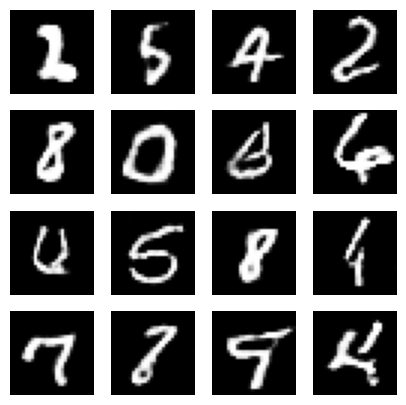

In [ ]:
print("\nDisplaying Generated Images:")
fig, axes = plt.subplots(4, 4, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, 0], cmap='gray')
    ax.axis('off')
plt.show()

Epoch 1/20, Step 0/938:
  Discriminator Loss: 0.6776, Accuracy: 0.7656
  Generator Loss: 0.7274
Epoch 1/20, Step 100/938:
  Discriminator Loss: 0.3597, Accuracy: 0.9062
  Generator Loss: 1.8361
Epoch 1/20, Step 200/938:
  Discriminator Loss: 0.6542, Accuracy: 0.5078
  Generator Loss: 2.4056
Epoch 1/20, Step 300/938:
  Discriminator Loss: 0.5462, Accuracy: 0.7812
  Generator Loss: 1.2046
Epoch 1/20, Step 400/938:
  Discriminator Loss: 0.3936, Accuracy: 0.8828
  Generator Loss: 1.4407
Epoch 1/20, Step 500/938:
  Discriminator Loss: 0.4938, Accuracy: 0.8281
  Generator Loss: 1.1059
Epoch 1/20, Step 600/938:
  Discriminator Loss: 0.5050, Accuracy: 0.7891
  Generator Loss: 0.9205
Epoch 1/20, Step 700/938:
  Discriminator Loss: 0.5382, Accuracy: 0.7969
  Generator Loss: 1.1099
Epoch 1/20, Step 800/938:
  Discriminator Loss: 0.5522, Accuracy: 0.6797
  Generator Loss: 1.6647
Epoch 1/20, Step 900/938:
  Discriminator Loss: 0.4962, Accuracy: 0.8281
  Generator Loss: 1.1041
Epoch 2/20, Step 0/938

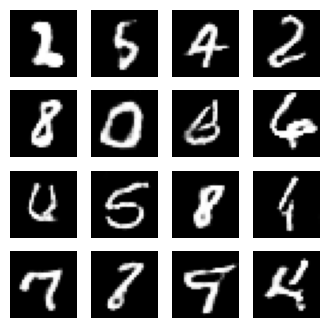

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 64
epochs = 20
k = 1
noise_dim = 100

# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Datasets and DataLoaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 7 * 7 * 128),
            nn.Unflatten(1, (128, 7, 7)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator().to(device)
discriminator = Discriminator().to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

# Fixed noise
fixed_noise = torch.randn(16, noise_dim, device=device)

# Training loop
for epoch in range(epochs):
    for step, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        current_batch_size = real_images.size(0)

        # Train Discriminator k times
        for _ in range(k):
            real_labels = torch.ones(current_batch_size, 1, device=device)
            output_real = discriminator(real_images)
            loss_real = criterion(output_real, real_labels)

            noise = torch.randn(current_batch_size, noise_dim, device=device)
            fake_images = generator(noise)
            fake_labels = torch.zeros(current_batch_size, 1, device=device)
            output_fake = discriminator(fake_images.detach())
            loss_fake = criterion(output_fake, fake_labels)

            loss_D = (loss_real + loss_fake) / 2
            optimizer_D.zero_grad()
            loss_D.backward()
            optimizer_D.step()

        # Train Generator
        noise = torch.randn(current_batch_size, noise_dim, device=device)
        fake_images = generator(noise)
        g_labels = torch.ones(current_batch_size, 1, device=device)
        output = discriminator(fake_images)
        loss_G = criterion(output, g_labels)

        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

        # Compute accuracies
        with torch.no_grad():
            acc_real = (output_real > 0.5).float().mean().item()
            acc_fake = (output_fake < 0.5).float().mean().item()
            acc_D = (acc_real + acc_fake) / 2

        # Print progress
        if step % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Step {step}/{len(train_loader)}:")
            print(f"  Discriminator Loss: {loss_D.item():.4f}, Accuracy: {acc_D:.4f}")
            print(f"  Generator Loss: {loss_G.item():.4f}")

    # Generate images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            generated_images = generator(fixed_noise).cpu().detach().numpy()
            generated_images = (generated_images + 1) / 2
            fig, axes = plt.subplots(4, 4, figsize=(4, 4))
            for i, ax in enumerate(axes.flat):
                ax.imshow(generated_images[i, 0], cmap='gray')
                ax.axis('off')
            plt.savefig(f'generated_images_epoch_{epoch+1}.png')
            plt.close()

# Evaluation function
def evaluate_discriminator(discriminator, dataloader, device):
    discriminator.eval()
    total_loss = 0
    total_acc = 0
    total_samples = 0
    criterion = nn.BCELoss()
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            labels = torch.ones(images.size(0), 1, device=device)
            outputs = discriminator(images)
            loss = criterion(outputs, labels)
            acc = (outputs > 0.5).float().mean().item()
            total_loss += loss.item() * images.size(0)
            total_acc += acc * images.size(0)
            total_samples += images.size(0)
    avg_loss = total_loss / total_samples
    avg_acc = total_acc / total_samples
    discriminator.train()
    return avg_loss, avg_acc

# Final evaluation
loss_train, acc_train = evaluate_discriminator(discriminator, train_loader, device)
print(f"\nFinal Training Results:")
print(f"  Discriminator Loss on Training Data: {loss_train:.4f}")
print(f"  Discriminator Accuracy on Training Data: {acc_train:.4f}")

loss_test, acc_test = evaluate_discriminator(discriminator, test_loader, device)
print(f"\nFinal Testing Results:")
print(f"  Discriminator Loss on Test Data: {loss_test:.4f}")
print(f"  Discriminator Accuracy on Test Data: {acc_test:.4f}")

# Combined evaluation
noise = torch.randn(len(test_dataset), noise_dim, device=device)
fake_images = generator(noise).detach()
real_images = []
for images, _ in test_loader:
    real_images.append(images.to(device))
real_images = torch.cat(real_images, dim=0)
combined_images = torch.cat([real_images, fake_images], dim=0)
combined_labels = torch.cat([torch.ones(len(test_dataset), 1, device=device),
                            torch.zeros(len(test_dataset), 1, device=device)], dim=0)
with torch.no_grad():
    combined_outputs = discriminator(combined_images)
    loss_combined = criterion(combined_outputs, combined_labels)
    acc_combined = ((combined_outputs > 0.5) == combined_labels).float().mean().item()
print(f"\nDiscriminator Performance on Combined Real and Fake Images:")
print(f"  Combined Loss: {loss_combined.item():.4f}")
print(f"  Combined Accuracy: {acc_combined:.4f}")

# Generate and display final images
noise = torch.randn(16, noise_dim, device=device)
generated_images = generator(noise).cpu().detach().numpy()
generated_images = (generated_images + 1) / 2
print("\nDisplaying Generated Images:")
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, 0], cmap='gray')
    ax.axis('off')
plt.show()

Epoch 1/20, Step 0/938:
  Discriminator Loss: 0.0857, Accuracy: 1.0000
  Generator Loss: 2.4217
Epoch 1/20, Step 100/938:
  Discriminator Loss: 0.0089, Accuracy: 1.0000
  Generator Loss: 5.4558
Epoch 1/20, Step 200/938:
  Discriminator Loss: 0.0344, Accuracy: 0.9922
  Generator Loss: 4.9498
Epoch 1/20, Step 300/938:
  Discriminator Loss: 0.0744, Accuracy: 0.9922
  Generator Loss: 4.1574
Epoch 1/20, Step 400/938:
  Discriminator Loss: 0.0489, Accuracy: 1.0000
  Generator Loss: 4.3212
Epoch 1/20, Step 500/938:
  Discriminator Loss: 0.0505, Accuracy: 0.9922
  Generator Loss: 5.1211
Epoch 1/20, Step 600/938:
  Discriminator Loss: 0.0525, Accuracy: 0.9844
  Generator Loss: 4.3378
Epoch 1/20, Step 700/938:
  Discriminator Loss: 0.0482, Accuracy: 0.9844
  Generator Loss: 5.2646
Epoch 1/20, Step 800/938:
  Discriminator Loss: 0.0556, Accuracy: 0.9922
  Generator Loss: 4.3555
Epoch 1/20, Step 900/938:
  Discriminator Loss: 0.0771, Accuracy: 0.9531
  Generator Loss: 5.5891
Epoch 2/20, Step 0/938

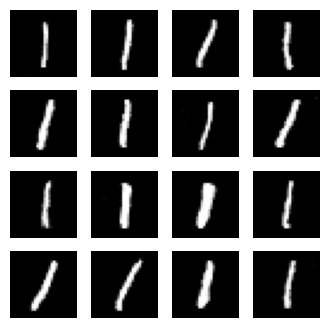

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 64
epochs = 20
k = 10
noise_dim = 100

# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Datasets and DataLoaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 7 * 7 * 128),
            nn.Unflatten(1, (128, 7, 7)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator().to(device)
discriminator = Discriminator().to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

# Fixed noise
fixed_noise = torch.randn(16, noise_dim, device=device)

# Training loop
for epoch in range(epochs):
    for step, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        current_batch_size = real_images.size(0)

        # Train Discriminator k times
        for _ in range(k):
            real_labels = torch.ones(current_batch_size, 1, device=device)
            output_real = discriminator(real_images)
            loss_real = criterion(output_real, real_labels)

            noise = torch.randn(current_batch_size, noise_dim, device=device)
            fake_images = generator(noise)
            fake_labels = torch.zeros(current_batch_size, 1, device=device)
            output_fake = discriminator(fake_images.detach())
            loss_fake = criterion(output_fake, fake_labels)

            loss_D = (loss_real + loss_fake) / 2
            optimizer_D.zero_grad()
            loss_D.backward()
            optimizer_D.step()

        # Train Generator
        noise = torch.randn(current_batch_size, noise_dim, device=device)
        fake_images = generator(noise)
        g_labels = torch.ones(current_batch_size, 1, device=device)
        output = discriminator(fake_images)
        loss_G = criterion(output, g_labels)

        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

        # Compute accuracies
        with torch.no_grad():
            acc_real = (output_real > 0.5).float().mean().item()
            acc_fake = (output_fake < 0.5).float().mean().item()
            acc_D = (acc_real + acc_fake) / 2

        # Print progress
        if step % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Step {step}/{len(train_loader)}:")
            print(f"  Discriminator Loss: {loss_D.item():.4f}, Accuracy: {acc_D:.4f}")
            print(f"  Generator Loss: {loss_G.item():.4f}")

    # Generate images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            generated_images = generator(fixed_noise).cpu().detach().numpy()
            generated_images = (generated_images + 1) / 2
            fig, axes = plt.subplots(4, 4, figsize=(4, 4))
            for i, ax in enumerate(axes.flat):
                ax.imshow(generated_images[i, 0], cmap='gray')
                ax.axis('off')
            plt.savefig(f'generated_images_epoch_{epoch+1}.png')
            plt.close()

# Evaluation function
def evaluate_discriminator(discriminator, dataloader, device):
    discriminator.eval()
    total_loss = 0
    total_acc = 0
    total_samples = 0
    criterion = nn.BCELoss()
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            labels = torch.ones(images.size(0), 1, device=device)
            outputs = discriminator(images)
            loss = criterion(outputs, labels)
            acc = (outputs > 0.5).float().mean().item()
            total_loss += loss.item() * images.size(0)
            total_acc += acc * images.size(0)
            total_samples += images.size(0)
    avg_loss = total_loss / total_samples
    avg_acc = total_acc / total_samples
    discriminator.train()
    return avg_loss, avg_acc

# Final evaluation
loss_train, acc_train = evaluate_discriminator(discriminator, train_loader, device)
print(f"\nFinal Training Results:")
print(f"  Discriminator Loss on Training Data: {loss_train:.4f}")
print(f"  Discriminator Accuracy on Training Data: {acc_train:.4f}")

loss_test, acc_test = evaluate_discriminator(discriminator, test_loader, device)
print(f"\nFinal Testing Results:")
print(f"  Discriminator Loss on Test Data: {loss_test:.4f}")
print(f"  Discriminator Accuracy on Test Data: {acc_test:.4f}")

# Combined evaluation
noise = torch.randn(len(test_dataset), noise_dim, device=device)
fake_images = generator(noise).detach()
real_images = []
for images, _ in test_loader:
    real_images.append(images.to(device))
real_images = torch.cat(real_images, dim=0)
combined_images = torch.cat([real_images, fake_images], dim=0)
combined_labels = torch.cat([torch.ones(len(test_dataset), 1, device=device),
                            torch.zeros(len(test_dataset), 1, device=device)], dim=0)
with torch.no_grad():
    combined_outputs = discriminator(combined_images)
    loss_combined = criterion(combined_outputs, combined_labels)
    acc_combined = ((combined_outputs > 0.5) == combined_labels).float().mean().item()
print(f"\nDiscriminator Performance on Combined Real and Fake Images:")
print(f"  Combined Loss: {loss_combined.item():.4f}")
print(f"  Combined Accuracy: {acc_combined:.4f}")

# Generate and display final images
noise = torch.randn(16, noise_dim, device=device)
generated_images = generator(noise).cpu().detach().numpy()
generated_images = (generated_images + 1) / 2
print("\nDisplaying Generated Images:")
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, 0], cmap='gray')
    ax.axis('off')
plt.show()

The one with k = 2 i.e number of times the discriminator is trained per generator training step = 2 is the best model

2nd_question - part c

From the output of part b :

k = 1: Equal updates may lead to faster generator learning but could result in less diversity or lower quality if the discriminator isn’t strong enough.
k = 2: A balanced approach, often yielding stable training and good diversity/quality.
k = 5: More discriminator updates might overpower the generator, risking mode collapse (e.g., generating only a few digit types) or poor-quality outputs.
k = 10 : More discriminator updates might overpower the generator, risking mode collapse (e.g., generating only a few digit types) and poor-quality outputs.

# 3rd_Ques